# Makemore

In [3]:
!*go mod edit -replace "github.com/richiejp/makemore=${HOME}/go/src/github.com/richiejp/makemore"

In [4]:
import (
    "os"
    "fmt"
    "math/rand"
   "github.com/richiejp/makemore/pkg/data"
    "github.com/richiejp/makemore/pkg/viz"
    "github.com/janpfeifer/gonb/cache"
)


...


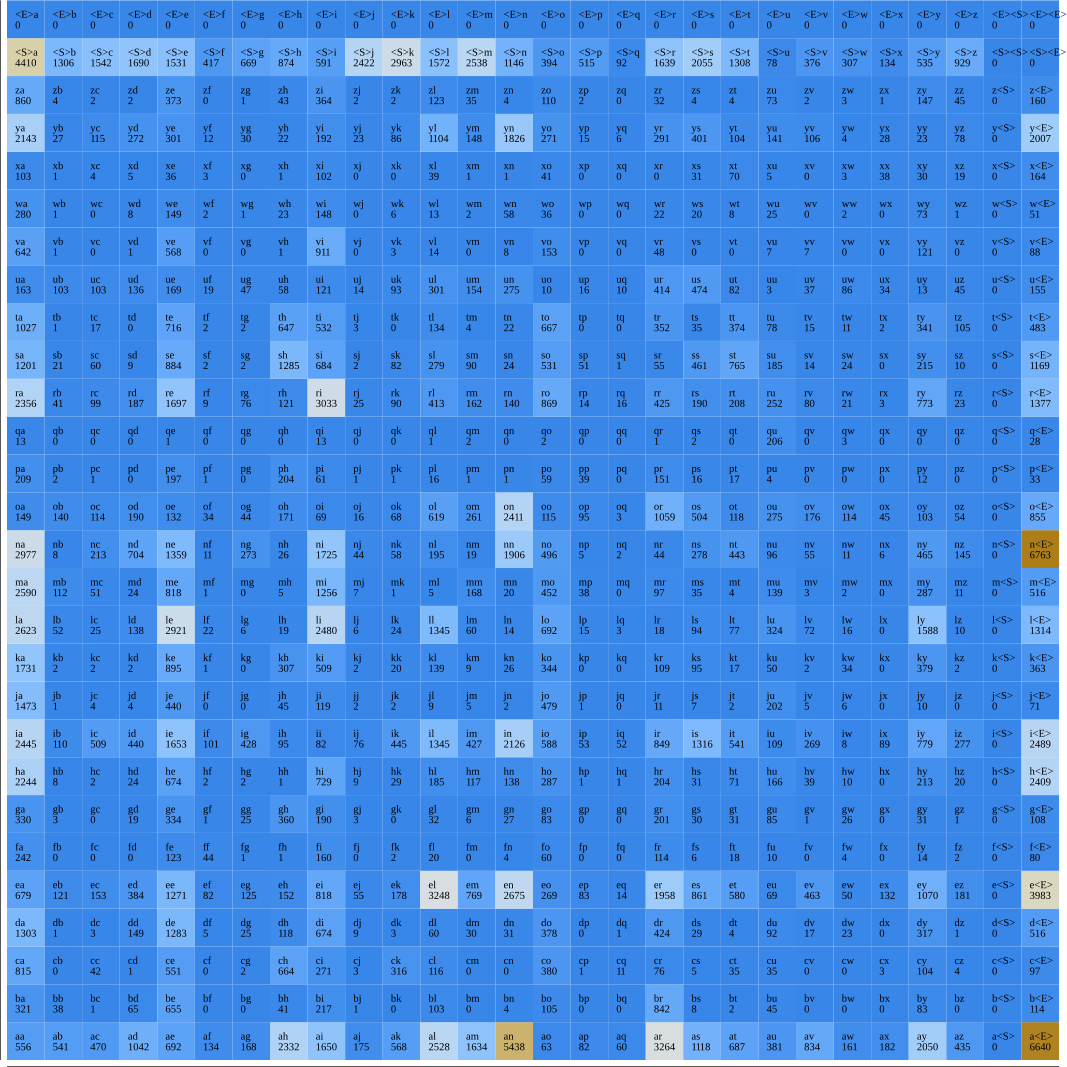

In [5]:
%%
counted, _ := data.Names(0)
img := viz.Heatmap(counted)
gonbui.DisplayPng(img)

In [11]:
%%
counted, _ := data.Names(0)
s := 26 // <S>
probs := data.Probabilities(counted[s])

fmt.Printf("Probs %s: ", data.CharIndxToString(s))
for i, p := range probs {
    fmt.Printf("%s=%v ", data.CharIndxToString(i), p)
}
fmt.Printf("\nSamples: ")
gen := rand.New(rand.NewSource(2147483647))

for _ = range 50 {
    fmt.Printf("%s ", data.CharIndxToString(data.Sample(probs, gen)))
}

...
Probs <S>: a=0.1376705272687541 b=0.04077045546779883 c=0.04813785783410857 d=0.052758093216370615 e=0.04779446196110261 f=0.013017825367589672 g=0.020884712640089908 h=0.027284363000655575 i=0.018449723722411264 j=0.07560952767458558 k=0.09249836106515157 l=0.049074392033215744 m=0.07923079324446665 n=0.035775606405893924 o=0.012299815814940843 p=0.01607717041800643 q=0.0028720382105953237 r=0.05116598507788843 s=0.0641525926388412 t=0.040832891081072645 u=0.002434988917678644 v=0.011737895295476539 w=0.009583866637530048 x=0.004183186089345363 y=0.016701526550744545 z=0.029001342365685388 <S>=0 <E>=0 
Samples: w d m a h e c m t b e t s d l d r a r r g j k d c m i e m j a e b n e h m g k a k a p l s a t w j s 

In [7]:
%%
counted, _ := data.Names(0)

fmt.Printf("\nSamples: ")
gen := rand.New(rand.NewSource(2147483647))
for _ = range 50 {
    s := 26 // <S>
    probs := data.Probabilities(counted[s])
    
    for _ = range 120 {
        i := data.Sample(probs, gen)
        if i == 27 { // <E>
            break
        }
        fmt.Printf("%s", data.CharIndxToString(i))
        probs = data.Probabilities(counted[i])
    }

    fmt.Printf(" ")
}
fmt.Printf("\n")

...

Samples: wasamair be shreyay ghlelmbetialayilleqanayn a we a juazizan kah siem kaylel couryn rya conghes iemalllo sisa lyaareeteva sh aidyn lidal oret kal a jano kha a kyalya jandamess d on deblynnali te lyn mararami lia kevidlyn nadiaia a lile ncriysl bukelilar m zandr rya man brllenekie ria r deerlalile layal 


In [8]:
import "github.com/gomlx/gomlx/backends"

%%
backend := backends.MustNew()

fmt.Printf("Backend: %s, %s\n", backend.Name(), backend.Description())

counted, _ := data.Names(0)

sums := data.ToProbabilities(backend, counted)

fmt.Printf("Prob cum sums: %v\n", sums.Summary(6))

st := data.SampleTensor(backend, sums, int64(1))

fmt.Printf("Sample Vector: %v\n", st.Summary(6))

fmt.Printf("\nSamples: ")
for i := range 50 {
    s := 26 // <S>
    probs := data.SampleTensor(backend, sums, int64(i))
    c := int32(s)
    
    for j := range 120 {
        tensors.ConstFlatData[int32](probs, func(flat []int32){
            c = flat[c]
        })
        if c == 27 { // <E>
            break
        }
        fmt.Printf("%s", data.CharIndxToString(int(c)))
        probs = data.SampleTensor(backend, sums, int64((i+1)*j))
    }

    fmt.Printf(" ")
}
fmt.Printf("\n")

Backend: SimpleGo (go), Simple Go Portable Backend
...
Prob cum sums: [27][28]float32{
 {0.0164084, 0.0323742, 0.0462447, ..., 0.804043, 0.804043, 1},
 {0.121361, 0.135728, 0.136106, ..., 0.9569, 0.9569, 1},
 {0.230747, 0.230747, 0.242639, ..., 0.972537, 0.972537, 1},
 ...,
 {0.21921, 0.221972, 0.233736, ..., 0.794701, 0.794701, 1},
 {0.358632, 0.3603, 0.361134, ..., 0.933278, 0.933278, 1},
 {0.137671, 0.178441, 0.226579, ..., 1, 1, 1}}
Sample Vector: [27]int32{8, 4, 0, ..., 0, 0, 2}

Samples: midih ckispshadat lmastazil etr n ckiat mikanyollyne go urtryi ron jidyn cka aua aubrbrel aush rolala ckov n mita or yridigariami h trie ji yryrulizry ss wn ssovedianstr lmayrccan aulli fos orah aun klylilia ssseasuratiudyostonan miggraun eta aua aundlilesanori kll lmrkela sseliasttei ckh klyaimer ss sseneedryriviv ckyman ssetabonezay dor lmiky 


In [9]:
%%

counted, _ := data.Names(1)
f, s := data.NamesScanner()

chn := 0
for s.Scan() {
    name := s.Bytes()
    chn += len(name) + 2
}

f.Close()
f, s = data.NamesScanner()

log_likelihood := 0.0
i := 0
for s.Scan() {
    name := s.Bytes()

    ch1 := int(data.StartToken)
    ch2 := int(name[0] - 'a')
    for j := range len(name) + 1 {
        p := data.Probabilities(counted[ch1])[ch2]
        lp := math.Log(p)

        log_likelihood += lp / float64(chn)

        if i < 3 {
            fmt.Printf("%v%v: %f %f\n", data.CharIndxToString(ch1), data.CharIndxToString(ch2), lp / float64(chn), log_likelihood)
        }
        
        ch1 = ch2
        if j + 1 < len(name) {
            ch2 = int(name[j + 1] - 'a')
        } else {
            ch2 = data.EndToken
        }
    }

    i += 1
}

fmt.Printf("chn: %v, log_likelihood: %.4f\n", chn, -log_likelihood)

...
<S>e: -0.000012 -0.000012
em: -0.000013 -0.000024
mm: -0.000014 -0.000038
ma: -0.000004 -0.000042
a<E>: -0.000006 -0.000048
<S>o: -0.000017 -0.000065
ol: -0.000010 -0.000075
li: -0.000007 -0.000082
iv: -0.000016 -0.000098
vi: -0.000004 -0.000102
ia: -0.000008 -0.000109
a<E>: -0.000006 -0.000116
<S>a: -0.000008 -0.000123
av: -0.000014 -0.000138
va: -0.000005 -0.000143
a<E>: -0.000006 -0.000149
chn: 260179, log_likelihood: 2.1525


In [10]:
import "github.com/gomlx/gomlx/types/tensors"

%%

_, pairs := data.Names(1)

xs := make([]int, len(pairs))
ys := make([]int, len(pairs))

for i, p := range pairs {
    xs[i] = p.Ch1
    ys[i] = p.Ch2
}

xt := tensors.FromValue(xs)
yt := tensors.FromValue(ys)

fmt.Printf("xt: %v\n", xt.Summary(1))
fmt.Printf("yt: %v\n", yt.Summary(1))

...
xt: [784]int64{9, 5, 27, ..., 0, 0, 13}
yt: [784]int64{25, 9, 26, ..., 13, 27, 27}
